<a href="https://colab.research.google.com/github/kintanpitaloka/Coffee-Sales-Analytics/blob/main/Coffee_Sales_Analytics_for_Smarter_Business_Decisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Coffee Sales Analytics for Smarter Business**



https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset?select=Coffe_sales.csv

About Dataset
This dataset contains coffee shop transaction records, including details about sales, payment type, time of purchase, and customer preferences.
It is specifically curated for data visualization, dashboard building, and business analytics projects in tools like Power BI, Tableau, and Python visualization libraries (Matplotlib, Seaborn, Plotly).

With attributes covering time of day, weekdays, months, coffee types, and revenue, this dataset provides a strong foundation for analyzing customer behavior, sales patterns, and business performance trends


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Coffe_sales.csv to Coffe_sales.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('Coffe_sales.csv')

In [ ]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


*   Numerik: hour_of_day, money, Weekdaysort, Monthsort
*   Kategori: cash_type, coffee_name, Time_of_Day, Weekday, Month_name
*   Datetime (yet convert): Date, Time

In [ ]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
df.describe(include="object")

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Date,Time
count,3547,3547,3547,3547,3547,3547,3547
unique,1,8,3,7,12,381,3547
top,card,Americano with Milk,Afternoon,Tue,Mar,2024-10-11,18:11:38.635000
freq,3547,809,1205,572,494,26,1


In [ ]:
df.isnull().any()

,0
hour_of_day,False
cash_type,False
money,False
coffee_name,False
Time_of_Day,False
Weekday,False
Month_name,False
Weekdaysort,False
Monthsort,False
Date,False


#Exploratory Data Analysis

/tmp/ipython-input-3914673526.py:8: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


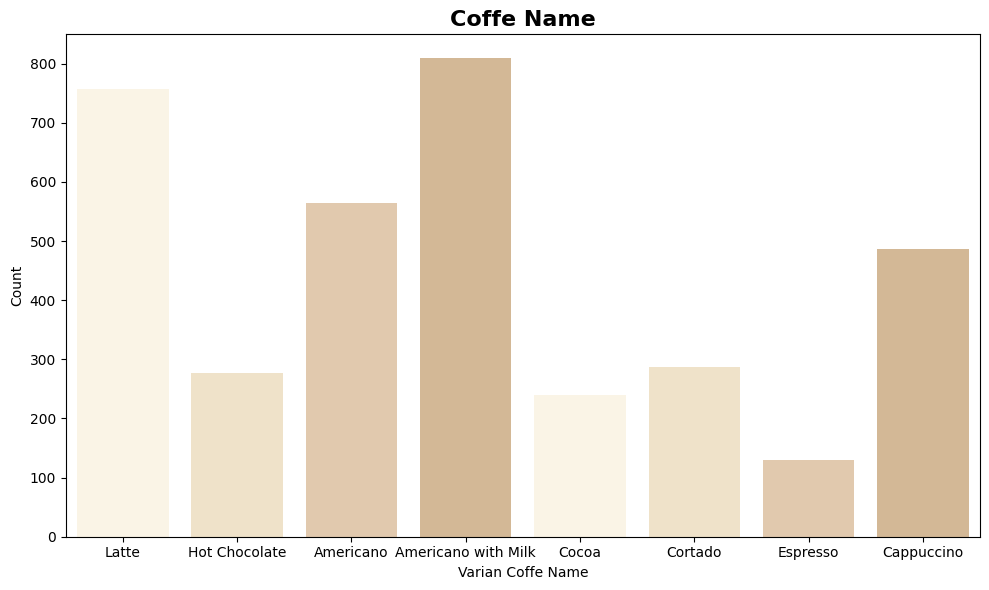

In [ ]:
#Bar Chart Top Selling Coffee
pastel_brown_palette = [
    "#fdf6e3", "#f5e4c3", "#eacaa5", "#ddb98c",
]

# Plot countplot dengan palette baru
plt.figure(figsize=(10,6))
sns.countplot(
    x='coffee_name',
    data=df,
    palette=pastel_brown_palette
)

plt.title("Coffe Name", fontsize=16, weight='bold')
plt.xlabel("Varian Coffe Name")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

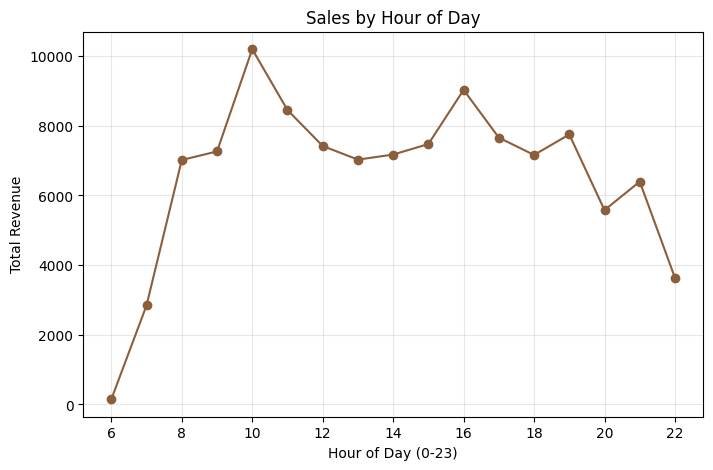

In [ ]:
# group by hour dan hitung total revenue (money)
hourly_sales = df.groupby('hour_of_day')['money'].sum()

plt.figure(figsize=(8,5))
hourly_sales.plot(kind='line', marker='o', color=["#8b5e3c"])
plt.title("Sales by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Total Revenue")
plt.grid(True, alpha=0.3)
plt.show()

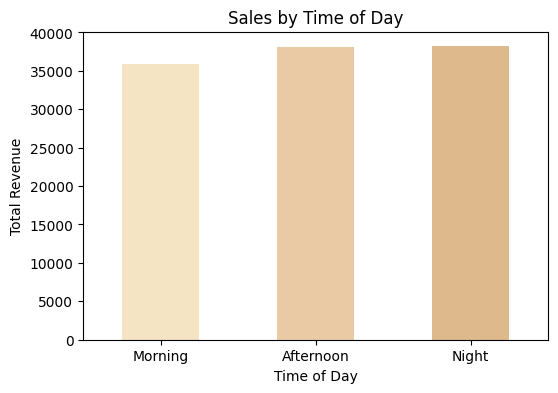

In [ ]:
# group by Morning/Afternoon/Night dan hitung total revenue
tod_sales = df.groupby('Time_of_Day')['money'].sum().reindex(['Morning','Afternoon','Night'])

plt.figure(figsize=(6,4))
tod_sales.plot(kind='bar', color=["#f5e4c3", "#eacaa5", "#ddb98c"])
plt.title("Sales by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

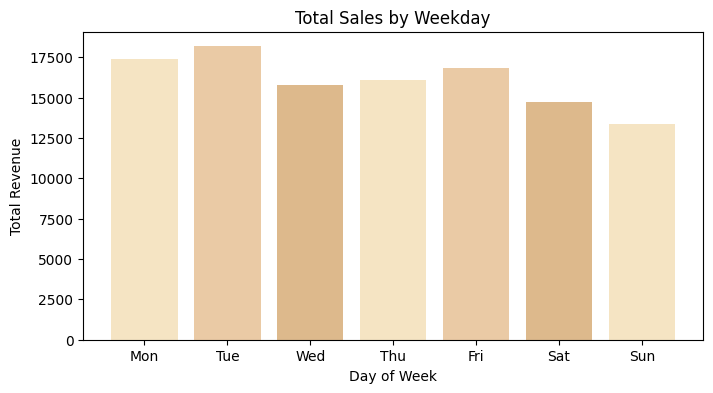

In [ ]:
weekday_sales = df.groupby('Weekday')['money'].sum()
# sort by custom order pakai Weekdaysort
weekday_sales = df.groupby(['Weekdaysort','Weekday'])['money'].sum().reset_index().sort_values('Weekdaysort')

plt.figure(figsize=(8,4))
plt.bar(weekday_sales['Weekday'], weekday_sales['money'], color=["#f5e4c3", "#eacaa5", "#ddb98c"])
plt.title("Total Sales by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.show()


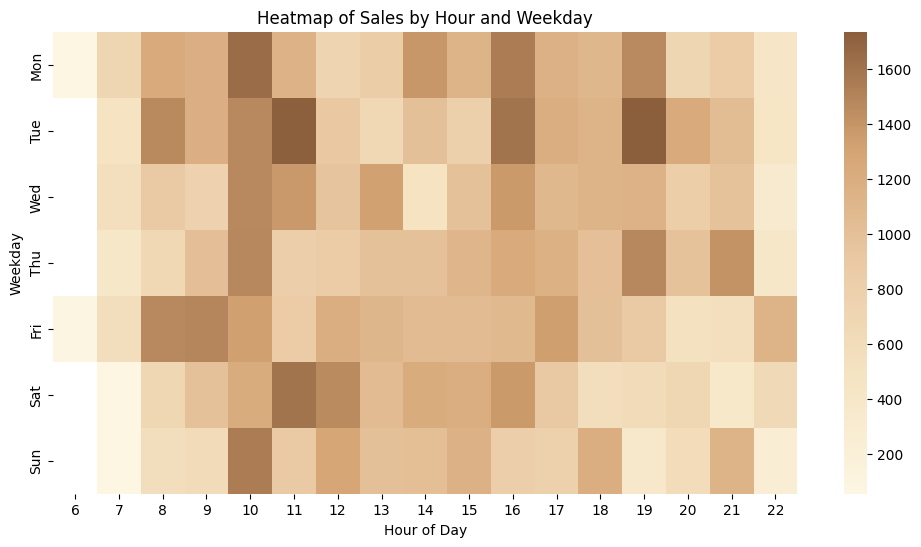

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list(
    "custom",
    (["#fdf6e3", "#f5e4c3", "#eacaa5", "#d4a373", "#8b5e3c"])
)

heatmap_data = df.pivot_table(values='money', index='Weekday', columns='hour_of_day', aggfunc='sum')
heatmap_data = heatmap_data.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap=custom_cmap)
plt.title("Heatmap of Sales by Hour and Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.show()

##Data Preprocessing

In [54]:
features = df[['hour_of_day', 'money', 'coffee_name']]

# one-hot encode coffee_name
features_encoded = pd.get_dummies(features, columns=['coffee_name'])

In [61]:
features_encoded.head()

,hour_of_day,money,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,10,38.7,False,False,False,False,False,False,False,True
1,12,38.7,False,False,False,False,False,False,True,False
2,12,38.7,False,False,False,False,False,False,True,False
3,13,28.9,True,False,False,False,False,False,False,False
4,13,38.7,False,False,False,False,False,False,False,True


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

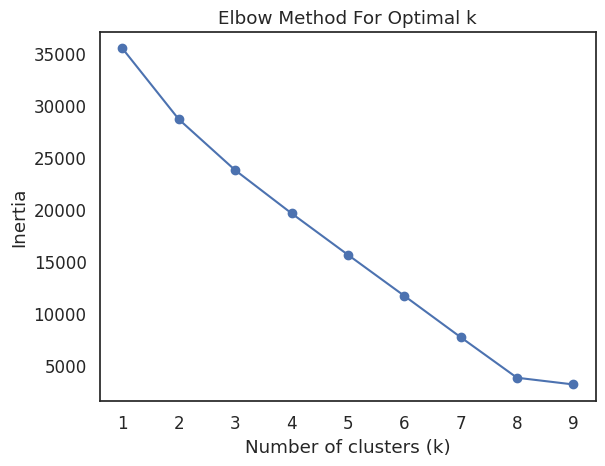

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [74]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(features_scaled)

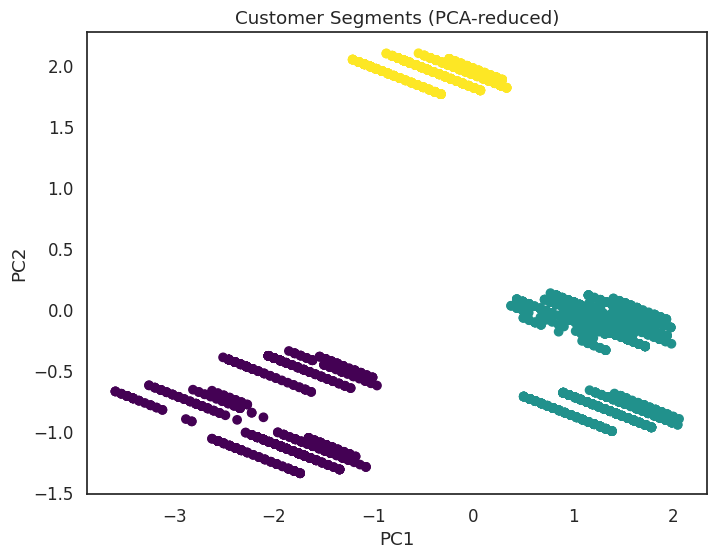

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_features[:,0], pca_features[:,1], c=df['cluster'], cmap='viridis')
plt.title("Customer Segments (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Text(0, 0.5, 'PC2')

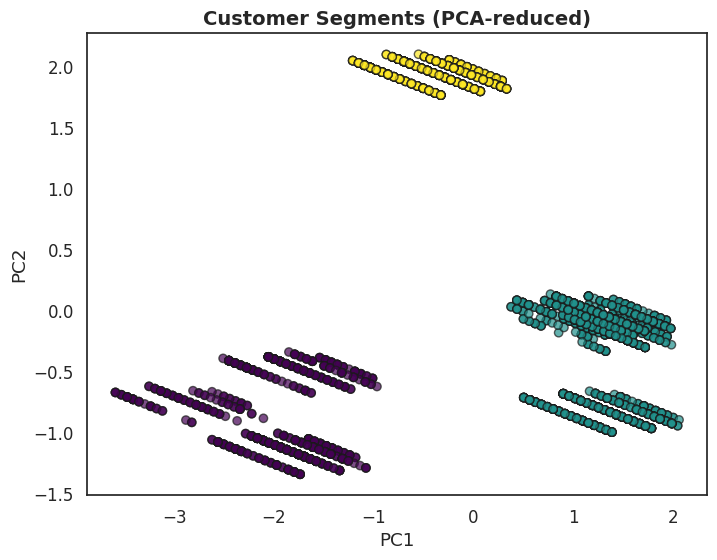

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(pca_features[:,0], pca_features[:,1],
            c=df['cluster'],
            cmap='viridis',
            alpha=0.7, edgecolor='k')
plt.title("Customer Segments (PCA-reduced)", fontsize=14, weight="bold")
plt.xlabel("PC1")
plt.ylabel("PC2")


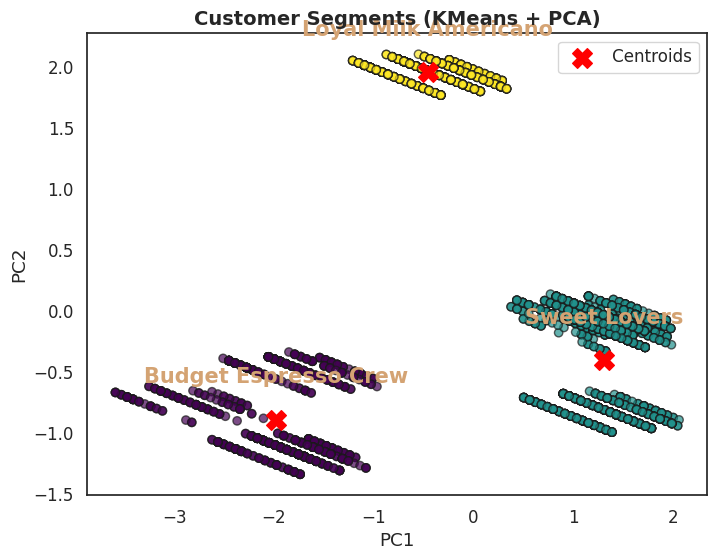

In [86]:
# Ambil hasil PCA dan cluster
x = pca_features[:, 0]
y = pca_features[:, 1]
clusters = df['cluster']

# Plot scatter tiap titik
plt.figure(figsize=(8,6))
plt.scatter(x, y, c=clusters, cmap='viridis', alpha=0.7,
            edgecolor='k', marker='o')

# Tambahin centroid cluster
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)  # transform biar sesuai space PCA
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c='red', marker='X', s=200, label='Centroids')

# Label manual per cluster (ganti sesuai insight kamu)
labels = {
    0: "Budget Espresso Crew",
    1: "Sweet Lovers",
    2: "Loyal Milk Americano"
}
for i, (cx, cy) in enumerate(centroids_pca):
    plt.text(cx, cy+0.3, labels[i], ha='center', fontsize=15,
             weight='bold', color="#d4a373")

# Styling plot
plt.title("Customer Segments (KMeans + PCA)", fontsize=14, weight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


In [89]:
from google.colab import files

# simpan csv
df.to_csv("coffee_customer_segments.csv", index=False)

# download
files.download("coffee_customer_segments.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>